In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Abro el archivo con los datos y veo las primeras 5 lineas

df = pd.read_csv("social media influencers - youtube.csv")

df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


In [408]:
# Me traigo información sobre las columnas

df.describe()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
count,1000,1000,723,1000,839,1000,962,791
unique,998,998,23,228,27,743,615,420
top,PrestonPlayz,Bollywood Classics,Music & Dance,10.1M,United States,1.1M,1.2K,1.8K
freq,2,2,224,34,291,18,17,14


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   youtuber name     1000 non-null   object
 1   channel name      1000 non-null   object
 2   Category          723 non-null    object
 3   Subscribers       1000 non-null   object
 4   Audience Country  839 non-null    object
 5   avg views         1000 non-null   object
 6   avg likes         962 non-null    object
 7   avg comments      791 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB


In [497]:
# Renombro las columnas para respetar el estilo snake_case

df.rename(columns = {'youtuber name': 'youtuber_name', 'channel name': 'channel_name', 'Category': 'category', 
                     'Subscribers': 'subscribers', 'Audience Country': 'audience_country', 'avg views': 'average_views', 
                     'avg likes': 'average_likes', 'avg comments': 'average_comments'}, inplace = True)

In [411]:
# Elimino youtubers duplicados

df.drop_duplicates(subset=['youtuber_name'])

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K
...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9.2M,Brazil,1.4M,110.1K,2.5K
996,EL GATO,EL GATO,Toys,9.2M,Brazil,243.8K,30.7K,636
997,CinemaSins,CinemaSins,Movies,9.2M,United States,296K,10.2K,874
998,CricketICC,ICC,Sports,9.2M,India,15.2K,854,58


In [412]:
# Cambio los NaN por No Data

df = df.fillna('No Data')

# Chequeo que ya no tenga mas NaN

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   youtuber_name     1000 non-null   object
 1   channel_name      1000 non-null   object
 2   category          1000 non-null   object
 3   subscribers       1000 non-null   object
 4   audience_country  1000 non-null   object
 5   average_views     1000 non-null   object
 6   average_likes     1000 non-null   object
 7   average_comments  1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [414]:
# Reemplazo K por 1000 y M por 1000000 en las celdas que quiero que sean numeros

for i in df.columns:
        if i != 'youtuber_name' and i != 'channel_name' and i != 'category' and i != 'audience_country':
            df[i] = df[i].replace({'No Data': '1234567890', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)


In [415]:
df['average_likes'] = df['average_likes'].replace({1234567890: np.nan})
df['average_comments'] = df['average_comments'].replace({1234567890: np.nan})
df

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800.0,290.0
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000,No Data,13800000,80900.0,NaN
2,setindia,SET India,No Data,130400000,India,23600,314.0,21.0
3,PewDiePie,PewDiePie,Animation,111400000,United States,1400000,80800.0,4600.0
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000.0,67700.0
...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9200000,Brazil,1400000,110100.0,2500.0
996,EL GATO,EL GATO,Toys,9200000,Brazil,243800,30700.0,636.0
997,CinemaSins,CinemaSins,Movies,9200000,United States,296000,10200.0,874.0
998,CricketICC,ICC,Sports,9200000,India,15200,854.0,58.0


In [416]:
# Para los avg likes o avg comments q no tenian dato, los complete con el promedio

df['average_likes'] = df['average_likes'].fillna(int(round(df.average_likes.mean(), 0)))
df['average_comments'] = df['average_comments'].fillna(int(round(df.average_comments.mean(), 0)))
df

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800.0,290.0
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000,No Data,13800000,80900.0,3349.0
2,setindia,SET India,No Data,130400000,India,23600,314.0,21.0
3,PewDiePie,PewDiePie,Animation,111400000,United States,1400000,80800.0,4600.0
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000.0,67700.0
...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9200000,Brazil,1400000,110100.0,2500.0
996,EL GATO,EL GATO,Toys,9200000,Brazil,243800,30700.0,636.0
997,CinemaSins,CinemaSins,Movies,9200000,United States,296000,10200.0,874.0
998,CricketICC,ICC,Sports,9200000,India,15200,854.0,58.0


In [417]:
# Acomodo el tipo de dato

df['average_likes'] = df['average_likes'].astype(int)
df['average_comments'] = df['average_comments'].astype(int)
df

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000,No Data,13800000,80900,3349
2,setindia,SET India,No Data,130400000,India,23600,314,21
3,PewDiePie,PewDiePie,Animation,111400000,United States,1400000,80800,4600
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000,67700
...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9200000,Brazil,1400000,110100,2500
996,EL GATO,EL GATO,Toys,9200000,Brazil,243800,30700,636
997,CinemaSins,CinemaSins,Movies,9200000,United States,296000,10200,874
998,CricketICC,ICC,Sports,9200000,India,15200,854,58


In [418]:
# Me traigo info de todas las columnas

df.describe(include = 'all')

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
count,1000,1000,1000,1.000000e+03,1000,1.000000e+03,1.000000e+03,1000.000000
unique,998,998,24,NaN,28,NaN,NaN,NaN
top,PrestonPlayz,Bollywood Classics,No Data,NaN,United States,NaN,NaN,NaN
freq,2,2,277,NaN,291,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.740430e+07,NaN,1.102656e+06,5.210981e+04,3348.919000
std,NaN,NaN,NaN,1.380312e+07,NaN,3.438304e+06,2.111486e+05,13585.326572
min,NaN,NaN,NaN,9.200000e+06,NaN,0.000000e+00,5.000000e+00,1.000000
25%,NaN,NaN,NaN,1.070000e+07,NaN,5.470000e+04,1.300000e+03,96.750000
50%,NaN,NaN,NaN,1.325000e+07,NaN,2.672500e+05,7.250000e+03,770.500000
75%,NaN,NaN,NaN,1.825000e+07,NaN,9.282000e+05,4.857500e+04,3349.000000


In [419]:
# Me creo un dataframe con algunos ratios entre likes, views, suscriptores y comentarios

ratios = pd.DataFrame()

ratios['youtuber_name'] = df['youtuber_name']
ratios['ratio_subscribers_views'] = df['average_views']/df['subscribers']
ratios['ratio_subscribers_likes'] = df['average_likes']/df['subscribers']
ratios['ratio_views_likes'] = df['average_likes']/df['average_views']
ratios['ratio_likes_comments'] = df['average_comments']/df['average_likes']

In [420]:
# Calculo los promedios de estos ratios

mean_subscribers_view = ratios['ratio_subscribers_views'].mean()
print(mean_subscribers_view)
mean_subscribers_likes = ratios['ratio_subscribers_likes'].mean()
print(mean_subscribers_likes)
mean_views_likes = ratios['ratio_views_likes'].mean()
print(mean_views_likes)
mean_likes_comments = ratios['ratio_likes_comments'].mean()
print(mean_likes_comments)

0.07235499913470075
0.003536509360985768
inf
2.6037108606880697


In [421]:
ratios.head(10)

,youtuber_name,ratio_subscribers_views,ratio_subscribers_likes,ratio_views_likes,ratio_likes_comments
0,tseries,0.001526,0.000046,0.030275,0.029592
1,checkgate,0.104466,0.000612,0.005862,0.041397
2,setindia,0.000181,0.000002,0.013305,0.066879
3,PewDiePie,0.012567,0.000725,0.057714,0.056931
4,MrBeast6000,0.330811,0.018378,0.055556,0.039824
5,✿ Kids Diana Show,0.114719,0.000506,0.004415,0.071560
6,Like Nastya,0.152053,0.000824,0.005416,0.045135
7,WWEFanNation,0.000881,0.000032,0.036554,0.058214
8,zeemusiccompany,0.001314,0.000051,0.038638,0.036905
9,Vlad and Niki,0.087065,0.000525,0.006029,0.079360


In [422]:
ratios['category'] = df['category']

In [423]:
porcentaje_views_likes = str((ratios['ratio_views_likes'].median())*100) + '%'
porcentaje_views_likes

# En esta instancia calculamos qué porcentaje de las views a un canal son retribuidas con un like.
# Se puede interpretar que son muy pocos los viewers que le dan like a un video. De todas formas esta estadística puede verse perjudicada 
# por el hecho de que un usuario puede dar like a un video una única vez, mientras que puede visualizarlo cuantas veces quiera.

'3.107241478116817%'

4 subplots de puntos que presenta los valores que toman los diferentes ratios calculados para cada canal

<ipython-input-468-65340761eb97>:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[0,0].set_xticks([])
<ipython-input-468-65340761eb97>:16: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[0,1].set_xticks([])
<ipython-input-468-65340761eb97>:20: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[1,0].set_xticks([])
<ipython-input-468-65340761eb97>:24: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[1,1]

[Text(0.5, 0, 'Canales de YouTube'), Text(0, 0.5, 'ratio_likes_comments')]

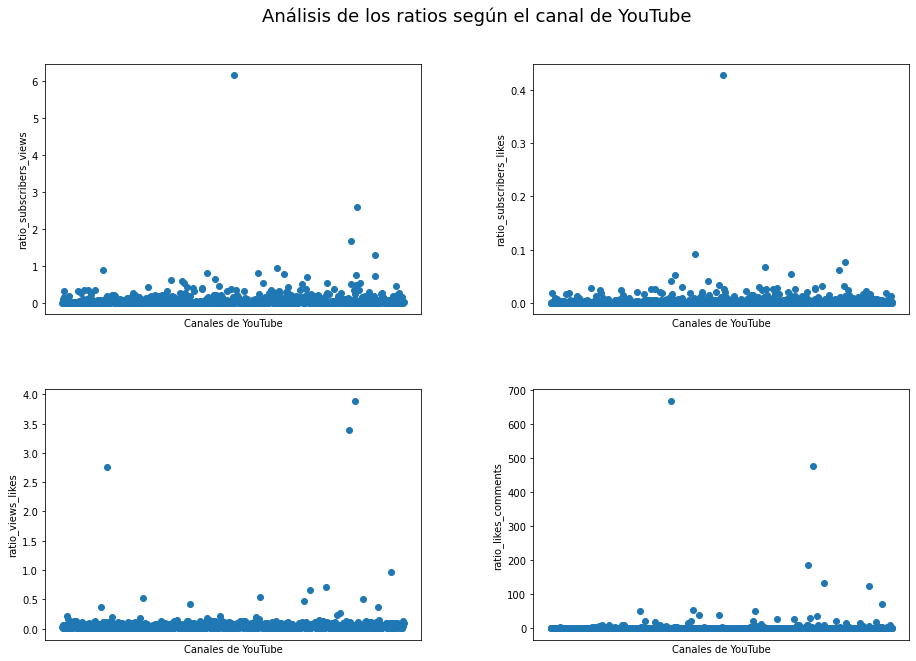

In [468]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis de los ratios según el canal de YouTube', size = 18)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)


ax[0,0].scatter(x = ratios['youtuber_name'], y = ratios['ratio_subscribers_views'])
ax[0,0].set_xticks([])
ax[0,0].set(xlabel="Canales de YouTube", ylabel="ratio_subscribers_views")

ax[0,1].scatter(x = ratios['youtuber_name'], y = ratios['ratio_subscribers_likes'])
ax[0,1].set_xticks([])
ax[0,1].set(xlabel="Canales de YouTube", ylabel="ratio_subscribers_likes")

ax[1,0].scatter(x = ratios['youtuber_name'], y = ratios['ratio_views_likes'])
ax[1,0].set_xticks([])
ax[1,0].set(xlabel="Canales de YouTube", ylabel="ratio_views_likes")

ax[1,1].scatter(x = ratios['youtuber_name'], y = ratios['ratio_likes_comments'])
ax[1,1].set_xticks([])
ax[1,1].set(xlabel="Canales de YouTube", ylabel="ratio_likes_comments")



Se determina cuántos canales tienen más comentarios que likes

In [471]:
mayor1 = 0
menor1 = 0

for i in ratios['ratio_likes_comments']:
    if i >= 1:
        mayor1 += 1
    else:
        menor1 += 1
        
print(mayor1)
print(menor1)

111
889


Gráfico de barras que muestra la cantidad de canales por país principal de audiencia

<AxesSubplot:xlabel='Country'>

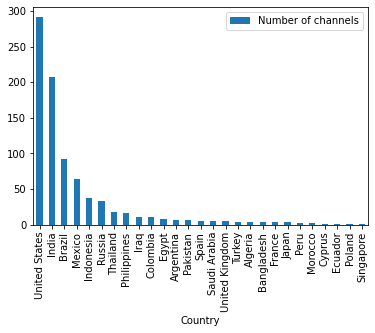

In [429]:
countries = set()
for country in df['audience_country']:
    if country != 'No Data':
        countries.add(country)
countries
    
channels_per_country = {}
for country in countries:
    channels_per_country[country] = 0
    for i in range(0, len(df)):
        if df['audience_country'][i] == country:
            channels_per_country[country] += 1

channels_per_country = pd.DataFrame(list(channels_per_country.items()),
                   columns=['Country', 'Number of channels'])

channels_per_country = channels_per_country.sort_values('Number of channels', ascending = False)

channels_per_country.plot.bar(x = 'Country', y = 'Number of channels')

Gráfico de barras que muestra la cantidad de canales por categoría de contenido

<AxesSubplot:xlabel='Category'>

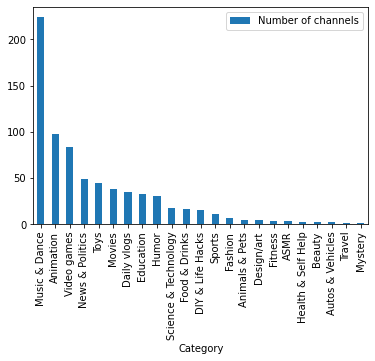

In [430]:
categories = set()
for category in df['category']:
    if category != 'No Data':
        categories.add(category)
    
channels_per_category = {}
for category in categories:
    channels_per_category[category] = 0
    for i in range(0, len(df)):
        if df['category'][i] == category:
            channels_per_category[category] += 1

channels_per_category = pd.DataFrame(list(channels_per_category.items()),
                   columns=['Category', 'Number of channels'])

channels_per_category = channels_per_category.sort_values('Number of channels', ascending = False)

channels_per_category.plot.bar(x = 'Category', y = 'Number of channels')

4 subplots de barras que muestran una estimación de la tendencia central para cada una de las categorías sobre los diferentes ratios. La barrita negra representa la incertidumbre de la estimación

/Users/vale/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


[]

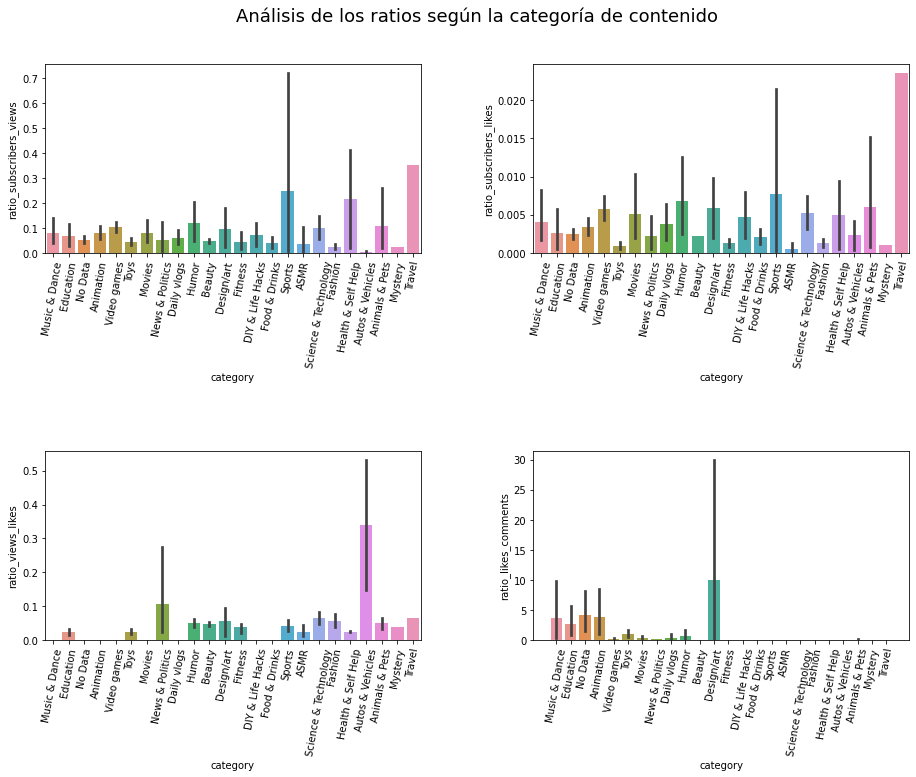

In [450]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis de los ratios según la categoría de contenido', size = 18)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=1.05)

ax = sns.barplot(ax=axes[0, 0], x = 'category', y = 'ratio_subscribers_views', data = ratios)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax1 = sns.barplot(ax=axes[0, 1], x = 'category', y = 'ratio_subscribers_likes', data = ratios)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax2 = sns.barplot(ax=axes[1, 0], x = 'category', y = 'ratio_views_likes', data = ratios)
ax2.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax3 = sns.barplot(ax=axes[1, 1], x = 'category', y = 'ratio_likes_comments', data = ratios)
ax3.set_xticklabels(ax.get_xticklabels(),rotation = 80)

plt.plot()

Group by por categoría

In [486]:
gbcategory = df.groupby(['category']).mean()
gbcategory = gbcategory.rename_axis('category').reset_index()
gbcategory

,category,subscribers,average_views,average_likes,average_comments
0,ASMR,1.613333e+07,4.629000e+05,6236.666667,243.666667
1,Animals & Pets,1.140000e+07,1.378625e+06,78450.000000,3126.000000
2,Animation,2.025876e+07,1.572297e+06,58515.876289,3706.051546
3,Autos & Vehicles,1.300000e+07,6.835000e+04,28905.000000,1763.000000
4,Beauty,2.015000e+07,9.392500e+05,45750.000000,2700.000000
5,DIY & Life Hacks,1.327333e+07,9.495133e+05,65687.333333,5571.066667
6,Daily vlogs,1.556857e+07,1.088660e+06,62868.742857,3674.342857
7,Design/art,1.577500e+07,1.785650e+06,94371.000000,4637.250000
8,Education,2.096970e+07,1.400327e+06,42126.363636,4107.272727
9,Fashion,1.147143e+07,2.848000e+05,14114.285714,660.000000


Gráfico de barras que muestra promedio de views por categoría de contenido

[]

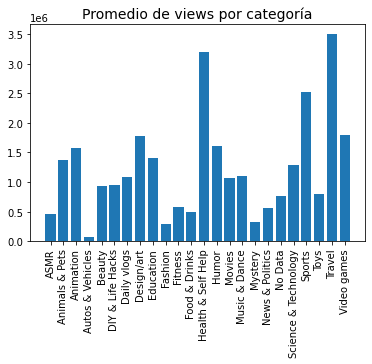

In [493]:
plt.bar(gbcategory["category"], gbcategory["average_views"])
plt.xticks(rotation='vertical')
plt.ylabel('
plt.title('Promedio de views por categoría', size = 14)
plt.plot()

Top 5 usuarios para diferentes variables

In [ ]:
df_by_subscribers = df.sort_values('subscribers', ascending = False)
top_5_subscribers = df_by_subscribers.head(5)

top_5_subscribers

In [ ]:
df_by_views = df.sort_values('average_views', ascending = False)
top_5_views = df_by_views.head(5)

top_5_views

In [ ]:
df_by_likes = df.sort_values('average_likes', ascending = False)
top_5_likes = df_by_likes.head(5)

top_5_likes

In [ ]:
df_by_comments = df.sort_values('average_comments', ascending = False)
top_5_comments = df_by_comments.head(5)
top_5_comments

In [ ]:
df.describe(include = 'all')